# 若さ vs 経験、どちらが有利か

#### **行ったこと**
- 年齢層ごとのメダル数を可視化することで、年齢とメダル獲得数の関係性を把握できた。
- 年齢層ごとのメダル数を棒グラフで表示し、どの年齢層が最も多くのメダルを獲得したかを視覚的に確認した。
- 高年齢層がどんな競技でメダルを取ったかを分析した。

In [4]:
import pandas as pd

df = pd.read_csv('olympics.csv')

df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [11]:
medal_df = df.dropna(subset=["Medal", "Age"])


# 年齢の設定

In [12]:
def age_group(age):
    if age < 25:
        return "Young"
    elif age < 30:
        return "Prime"
    else:
        return "Veteran"


In [13]:
medal_df["AgeGroup"] = medal_df["Age"].apply(age_group)


C:\Users\gtbao\AppData\Local\Temp\ipykernel_13416\3008082108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medal_df["AgeGroup"] = medal_df["Age"].apply(age_group)


# どの年齢層が最も多くのメダルを獲得したか

In [14]:
age_group_counts = {}

for group in ["Young", "Prime", "Veteran"]:
    age_group_counts[group] = len(medal_df[medal_df["AgeGroup"] == group])

age_group_counts


{'Young': 17939, 'Prime': 13014, 'Veteran': 8098}

In [15]:
age_medals = medal_df.groupby("AgeGroup").size()
age_medals


AgeGroup
Prime      13014
Veteran     8098
Young      17939
dtype: int64

# 棒グラフで図示

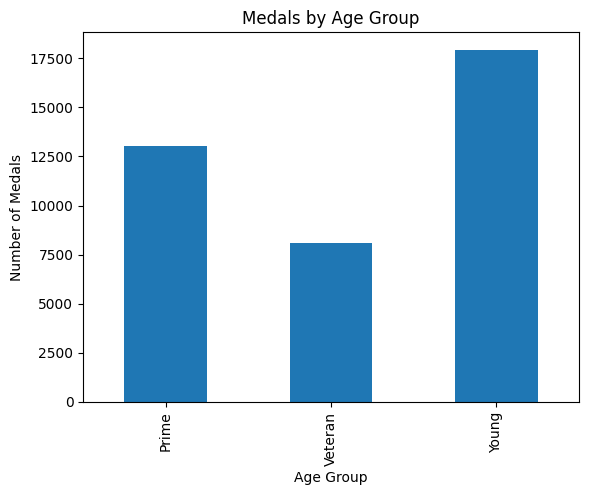

In [21]:
import matplotlib.pyplot as plt

age_medals.plot(kind="bar")
plt.title("Medals by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Medals")
plt.show()


# 30歳以上はどんな競技で結果を残しやすいか

C:\Users\gtbao\AppData\Local\Temp\ipykernel_13416\2190499815.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sports_counts.values, y=top_sports_counts.index, palette='viridis')
C:\Users\gtbao\AppData\Local\Temp\ipykernel_13416\2190499815.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset_top_10, x='Age', y='Sport', palette='Set3', order=top_10_sports)


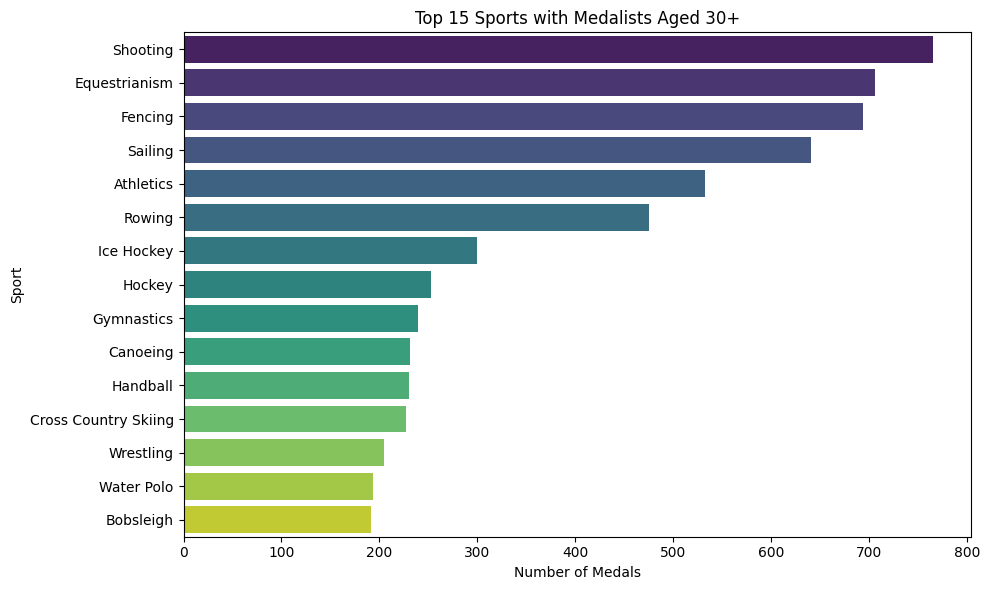

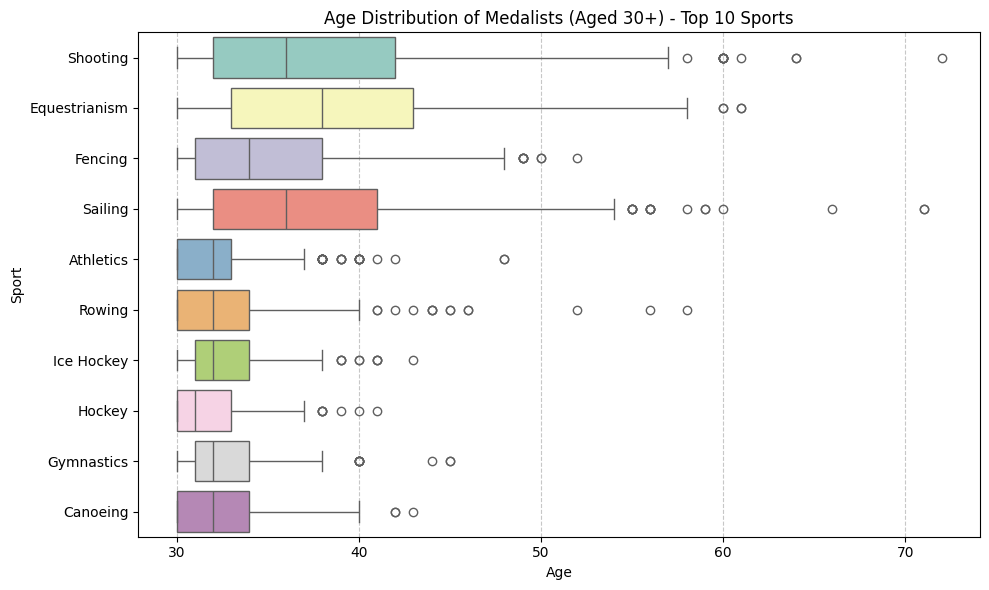

In [25]:

import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込み
df = pd.read_csv('olympics.csv')

# 30代以上のメダリストを抽出
medalists_30plus = df[(df['Age'] >= 30) & (df['Medal'].notna())]

# --- グラフ1: 競技別メダル獲得数 (Top 15) ---
top_sports_counts = medalists_30plus['Sport'].value_counts().head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_sports_counts.values, y=top_sports_counts.index, palette='viridis')
plt.title('Top 15 Sports with Medalists Aged 30+')
plt.xlabel('Number of Medals')
plt.ylabel('Sport')
plt.tight_layout()
plt.savefig('top_sports_30plus_bar.png')

# --- グラフ2: 競技別の年齢分布 (Top 10) ---
top_10_sports = top_sports_counts.head(10).index
subset_top_10 = medalists_30plus[medalists_30plus['Sport'].isin(top_10_sports)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=subset_top_10, x='Age', y='Sport', palette='Set3', order=top_10_sports)
plt.title('Age Distribution of Medalists (Aged 30+) - Top 10 Sports')
plt.xlabel('Age')
plt.ylabel('Sport')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('age_dist_30plus_box.png')

In [18]:
sport_age = (
    medal_df
    .groupby("Sport")["Age"]
    .mean()
    .sort_values()
)

sport_age.head()
sport_age.tail()


Sport
Polo                34.584615
Equestrianism       35.371728
Alpinism            38.812500
Art Competitions    42.328947
Roque               53.333333
Name: Age, dtype: float64

ポロ 34.584615  

馬術 35.371728  

アルピニズム 38.812500  

芸術競技 42.328947  

ロック 53.333333

# 分かったこと  

基本的に若い方が有利ではあるが、一部の競技（馬術、射撃など）はベテラン層のほうがメダルをとっている。

# 面白かったこと  

高齢になってから結果を残せる競技があるのは面白いと思った。この分析をしてはじめて芸術競技やポロ競技があることを知って面白かった。